## Trabajando con dataframes de Pandas

Teniendo estos dos dataframes:

```
fecha	value
0	2023-02-10	12
1	2023-02-11	22
2	2023-02-12	17
3	2023-02-13	16
4	2023-02-14	20
```

Y

```
i	value
0	1	25
1	2	32
2	3	19
3	4	17
4	5	21
```

¿Cómo conseguir unirlos en uno solo con extensión de la fecha?

In [167]:
import pandas as pd

# Creo el primer dataframe
data1 = {'i': [1, 2, 3, 4, 5],
        'value': [25, 32, 19, 17, 21]}

df1 = pd.DataFrame.from_dict(data1)
df1

,i,value
0,1,25
1,2,32
2,3,19
3,4,17
4,5,21


Creamos otro dataframe basado en fechas:

In [168]:
# Creo el segundo dataframe
data2 = {'fecha': ['2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14'],
        'value': [12, 22, 17, 16, 20]}

df2 = pd.DataFrame.from_dict(data2)
df2["fecha"] = pd.to_datetime(df2["fecha"]) # string to datetime
df2

,fecha,value
0,2023-02-10,12
1,2023-02-11,22
2,2023-02-12,17
3,2023-02-13,16
4,2023-02-14,20


Queremos unirlos de forma que df extienda a d2 con las fechas siguientes

In [169]:
# Intento unirlos, pero no lo hace como quiero
df3 = pd.concat([df, df2], axis=0)
df3

,i,value,fecha
0,1.0,25,NaT
1,2.0,32,NaT
2,3.0,19,NaT
3,4.0,17,NaT
4,5.0,21,NaT
0,NaN,12,2023-02-10
1,NaN,22,2023-02-11
2,NaN,17,2023-02-12
3,NaN,16,2023-02-13
4,NaN,20,2023-02-14


In [170]:
# Convierto la columna i en un índice de tiempo que comienza justo a fecha de hoy e incrementa 1 día en cada salto
# 1676332800 => Timestamp de hoy a las 00:00 en https://www.unixtimestamp.com/
df1.index = pd.DatetimeIndex((df1["i"] * 86400 + 1676332800) * 10**9)
df1 = df1.drop("i", axis=1)
df1

,value
i,
2023-02-15,25
2023-02-16,32
2023-02-17,19
2023-02-18,17
2023-02-19,21


In [171]:
# df2 ya tiene índice de fecha y llega hasta el día 14
df2.index = pd.DatetimeIndex(df2["fecha"])
df2 = df2.drop("fecha", axis=1)
df2

,value
fecha,
2023-02-10,12
2023-02-11,22
2023-02-12,17
2023-02-13,16
2023-02-14,20


In [172]:
# Ahora puedo unirlos de forma que los datos ocupen las columnas o índices correspondientes
df3 = pd.concat([df1, df2], axis=0)
df3

,value
2023-02-15,25
2023-02-16,32
2023-02-17,19
2023-02-18,17
2023-02-19,21
2023-02-10,12
2023-02-11,22
2023-02-12,17
2023-02-13,16
2023-02-14,20


In [173]:
# Re-ordeno el índice, para que quede incremental en el tiempo
df3 = df3.sort_index()
df3

,value
2023-02-10,12
2023-02-11,22
2023-02-12,17
2023-02-13,16
2023-02-14,20
2023-02-15,25
2023-02-16,32
2023-02-17,19
2023-02-18,17
2023-02-19,21


<AxesSubplot: >

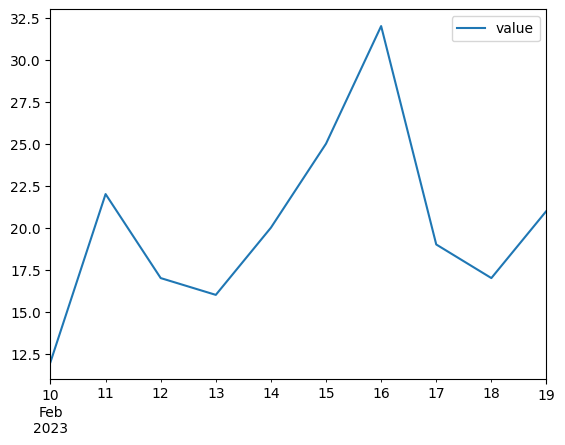

In [175]:
# import matplotlib.pyplot as plt
df3.plot()